<a href="https://colab.research.google.com/github/catafar/myfirstrepository/blob/main/ProyectoDSParteI%2BFariasCatalina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de accidentes de tránsito
Este proyecto explora un conjunto de datos sobre accidentes de tránsito, con el objetivo de identificar patrones relevantes en relación con las condiciones del entorno y la severidad de los incidentes. El dataset utilizado contiene registros de colisiones vehiculares, incluyendo variables como la fecha y hora del accidente, condición de iluminación, tipo de colisión, tipo de vía, y número total de personas lesionadas o fallecidas. A través de técnicas de visualización de datos y análisis exploratorio, se busca comprender mejor los factores que podrían influir en la gravedad de los accidentes.

Se implementan visualizaciones univariadas para conocer la distribución de variables clave como el tipo de colisión más frecuente y los horarios más comunes de ocurrencia. Luego, se utilizan gráficos bivariados y multivariados (como diagramas de barras apiladas y mapas de calor) para explorar relaciones entre variables categóricas y numéricas. Estas visualizaciones permiten detectar asociaciones relevantes, como una mayor cantidad de colisiones del tipo “ANGLE” o “TURNING”, o la presencia de más o menos accidentes bajo condiciones de poca visibilidad, como “DARKNESS” o “DAWN”.

Finalmente, se acompañan los gráficos con resúmenes numéricos e interpretaciones que vinculan los hallazgos con las hipótesis iniciales. El trabajo busca no solo describir los datos, sino también proporcionar información útil para el diseño de políticas de prevención vial, al destacar condiciones que podrían aumentar el riesgo o la severidad de los accidentes.

**Preguntas de interés**

- ¿En qué condiciones de iluminación ocurren más accidentes?

- ¿A qué hora del día ocurren más accidentes?

- ¿Hay diferencias en los accidentes según el tipo de colisión?

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_excel('/traffic_accidents.xlsx')
df.head()

,crash_date,exact_hour,AM_or_PM,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023,01:00:00,PM,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,13,7,7
1,08/13/2023,12:11:00,AM,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,2,0,1,8
2,2021-09-12 00:00:00,10:30:00,NaN,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,10,5,12
3,2023-09-08 00:00:00,19:55:00,NaN,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5,0,0,5,0,0,19,4,8
4,08/19/2023,02:55:00,PM,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,14,7,8


In [2]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
AM_or_PM,82529


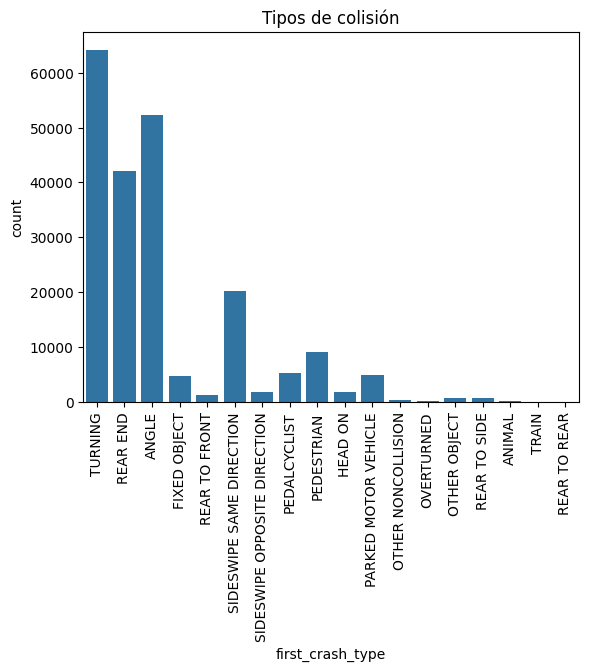

In [4]:
sns.countplot(data=df, x='first_crash_type')
plt.xticks(rotation=90)
plt.title('Tipos de colisión')
plt.show()

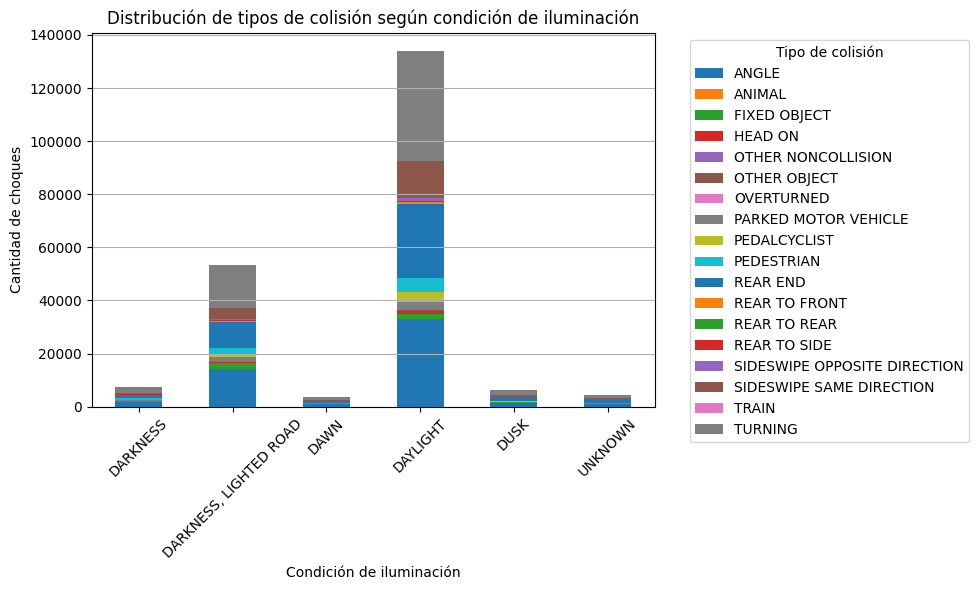

In [7]:
tabla = df.groupby(['lighting_condition', 'first_crash_type']).size().unstack().fillna(0)

# Gráfico de barras apiladas
tabla.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribución de tipos de colisión según condición de iluminación')
plt.xlabel('Condición de iluminación')
plt.ylabel('Cantidad de choques')
plt.xticks(rotation=45)
plt.legend(title='Tipo de colisión', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

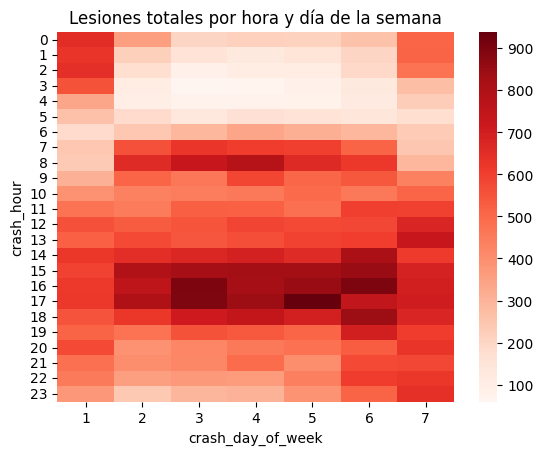

In [6]:
heatmap_data = df.groupby(['crash_hour', 'crash_day_of_week'])['injuries_total'].sum().unstack()
sns.heatmap(heatmap_data, cmap='Reds')
plt.title('Lesiones totales por hora y día de la semana')
plt.show()